# 1.5 Supervised Learning Algorithms Part 2 - ANN

## 01 Import Libraries & Dataset
## 02 Filtering Weather Data for Model Training
## 03 Implementing ANN for Accuracy & Evaluating Model

### 01 Import Libraries & Dataset

In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [8]:
# Create a path for the import of dataset

path = r'C:\Users\wallm\02 2025 Machine Learning Project\02 Data'

In [9]:
# Import 'un-scaled' weather dataset

climate = pd.read_csv(os.path.join(path, '01 Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [10]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [11]:
climate = climate.round(3)

In [12]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [13]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.000,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.001,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.010,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.018,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.033,0.46,0.00,0,5.7,5.7,3.0,8.4


In [14]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB


In [15]:
climate.shape

(22950, 170)

In [16]:
# Import the 'Pleasant weather' dataset

pleasantweather = pd.read_csv(os.path.join(path, '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [17]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
pleasantweather.shape

(22950, 16)

### 02 Filtering Weather Data for Model Training

##### Missing columns GDANSK, ROMA, & TOURS from climate dataset.

In [21]:
# Identify columns that contain 'temp_' but exclude unwanted stations

temp_cols = [col for col in climate.columns if 'temp_' in col and not any(station in col for station in ['GDANSK', 'ROMA', 'TOURS'])]

# Create the filtered DataFrame (without 'DATE' and 'MONTH')

df = climate[temp_cols].copy()

In [22]:
df.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,5.1,9.3,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,3.1,7.7,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,5.3,6.8,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,4.4,6.7,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,5.3,8.0,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4


In [23]:
df.columns

Index(['BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max',
       'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
       'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max',
       'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max',
       'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max',
       'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max',
       'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max',
       'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max',
       'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max',
       'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max',
       'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max',
       'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max',
       'VALENTIA_temp_me

In [24]:
### Create an 'X' matrix (Date and month columns already dropped)

X = df.copy()

### Define y (target labels) - dropping 'DATE' from the pleasant weather dataset

y = pleasantweather.drop(columns=['DATE'])

In [25]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [26]:
#Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [28]:
X_train[:10]

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,20.4,13.6,26.9,22.5,16.2,28.6,22.5,18.6,27.1,16.3,...,16.5,2.3,0.8,3.8,8.5,5.0,11.9,15.6,13.7,17.6
20472,-1.8,-3.2,-0.5,-3.6,-6.0,0.1,-3.3,-7.2,-0.2,-2.5,...,-8.2,-17.4,-19.2,-15.6,-6.9,-9.4,-4.6,10.7,7.9,13.5
18269,-1.8,-6.0,0.7,3.2,1.6,6.7,-0.4,-1.3,1.0,-4.9,...,-11.7,-14.1,-15.5,-12.7,-8.3,-13.3,-5.5,1.0,-3.9,5.9
7713,-1.4,-3.8,2.1,0.7,0.3,2.5,1.5,-0.2,4.0,0.2,...,-2.9,-20.9,-22.4,-19.4,-2.2,-5.2,-1.5,6.8,5.5,9.6
21958,6.1,1.8,13.5,6.7,1.7,11.7,6.2,2.6,10.8,5.7,...,5.3,-14.7,-16.6,-12.7,1.0,-0.6,3.5,10.7,7.9,13.5
11464,18.3,10.6,24.1,18.7,14.7,24.0,18.7,14.5,22.0,12.1,...,16.3,-2.6,-3.9,-1.3,10.0,7.7,15.6,13.1,9.0,16.9
3984,3.7,-0.5,6.3,4.4,3.4,5.0,4.7,4.3,5.4,5.2,...,-0.2,-2.6,-4.1,-1.0,1.1,0.0,2.6,10.9,9.3,12.5
4752,-3.9,-7.4,-1.6,0.5,0.0,1.7,2.1,1.3,2.8,2.3,...,3.5,-10.3,-12.3,-8.2,1.3,-1.2,3.0,10.5,9.7,11.4
11092,15.7,11.2,22.4,21.3,14.1,26.9,20.6,15.7,25.7,13.5,...,19.3,-0.7,-2.2,0.8,11.9,8.6,15.8,12.6,9.5,15.8
21377,18.8,9.9,26.0,23.6,20.1,27.2,21.6,16.9,27.2,19.0,...,29.3,4.4,-0.7,9.5,20.0,14.2,26.4,10.7,7.9,13.5


In [29]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


##### Note the features all have a mean of zero and a standard deviation of one.

In [31]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

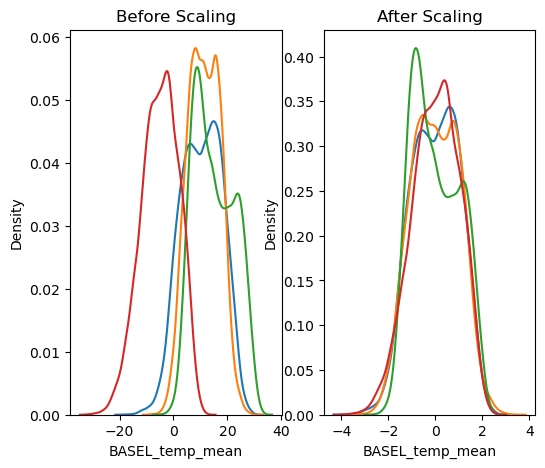

In [32]:
#Show scaling differences

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['HEATHROW_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(X_train['SONNBLICK_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['HEATHROW_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['SONNBLICK_temp_mean'], ax=ax2)

plt.show()

In [33]:
# Train ANN on unscaled data
mlp_unscaled = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=500)
mlp_unscaled.fit(X_train, y_train)
acc_unscaled = mlp_unscaled.score(X_test, y_test)

# Train ANN on scaled data
mlp_scaled = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=500)
mlp_scaled.fit(X_train_df, y_train)
acc_scaled = mlp_scaled.score(X_test_df, y_test)

print(f'Unscaled Accuracy: {acc_unscaled:.4f}')
print(f'Scaled Accuracy: {acc_scaled:.4f}')

Unscaled Accuracy: 0.4540
Scaled Accuracy: 0.4570


#### Scaled is slightly better

### 03 Implementing ANN for Accuracy & Evaluating Model

#### Model config (5,5), max_iter=500, tol=0.0001 - Training and Test (original settings)

In [37]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

##### The ANN has not yet converged on an answer. Let's see how accurate it is.

In [39]:
# evaluate the trained model on the test dataset instead of the training dataset.

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))

0.44939577039274925


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


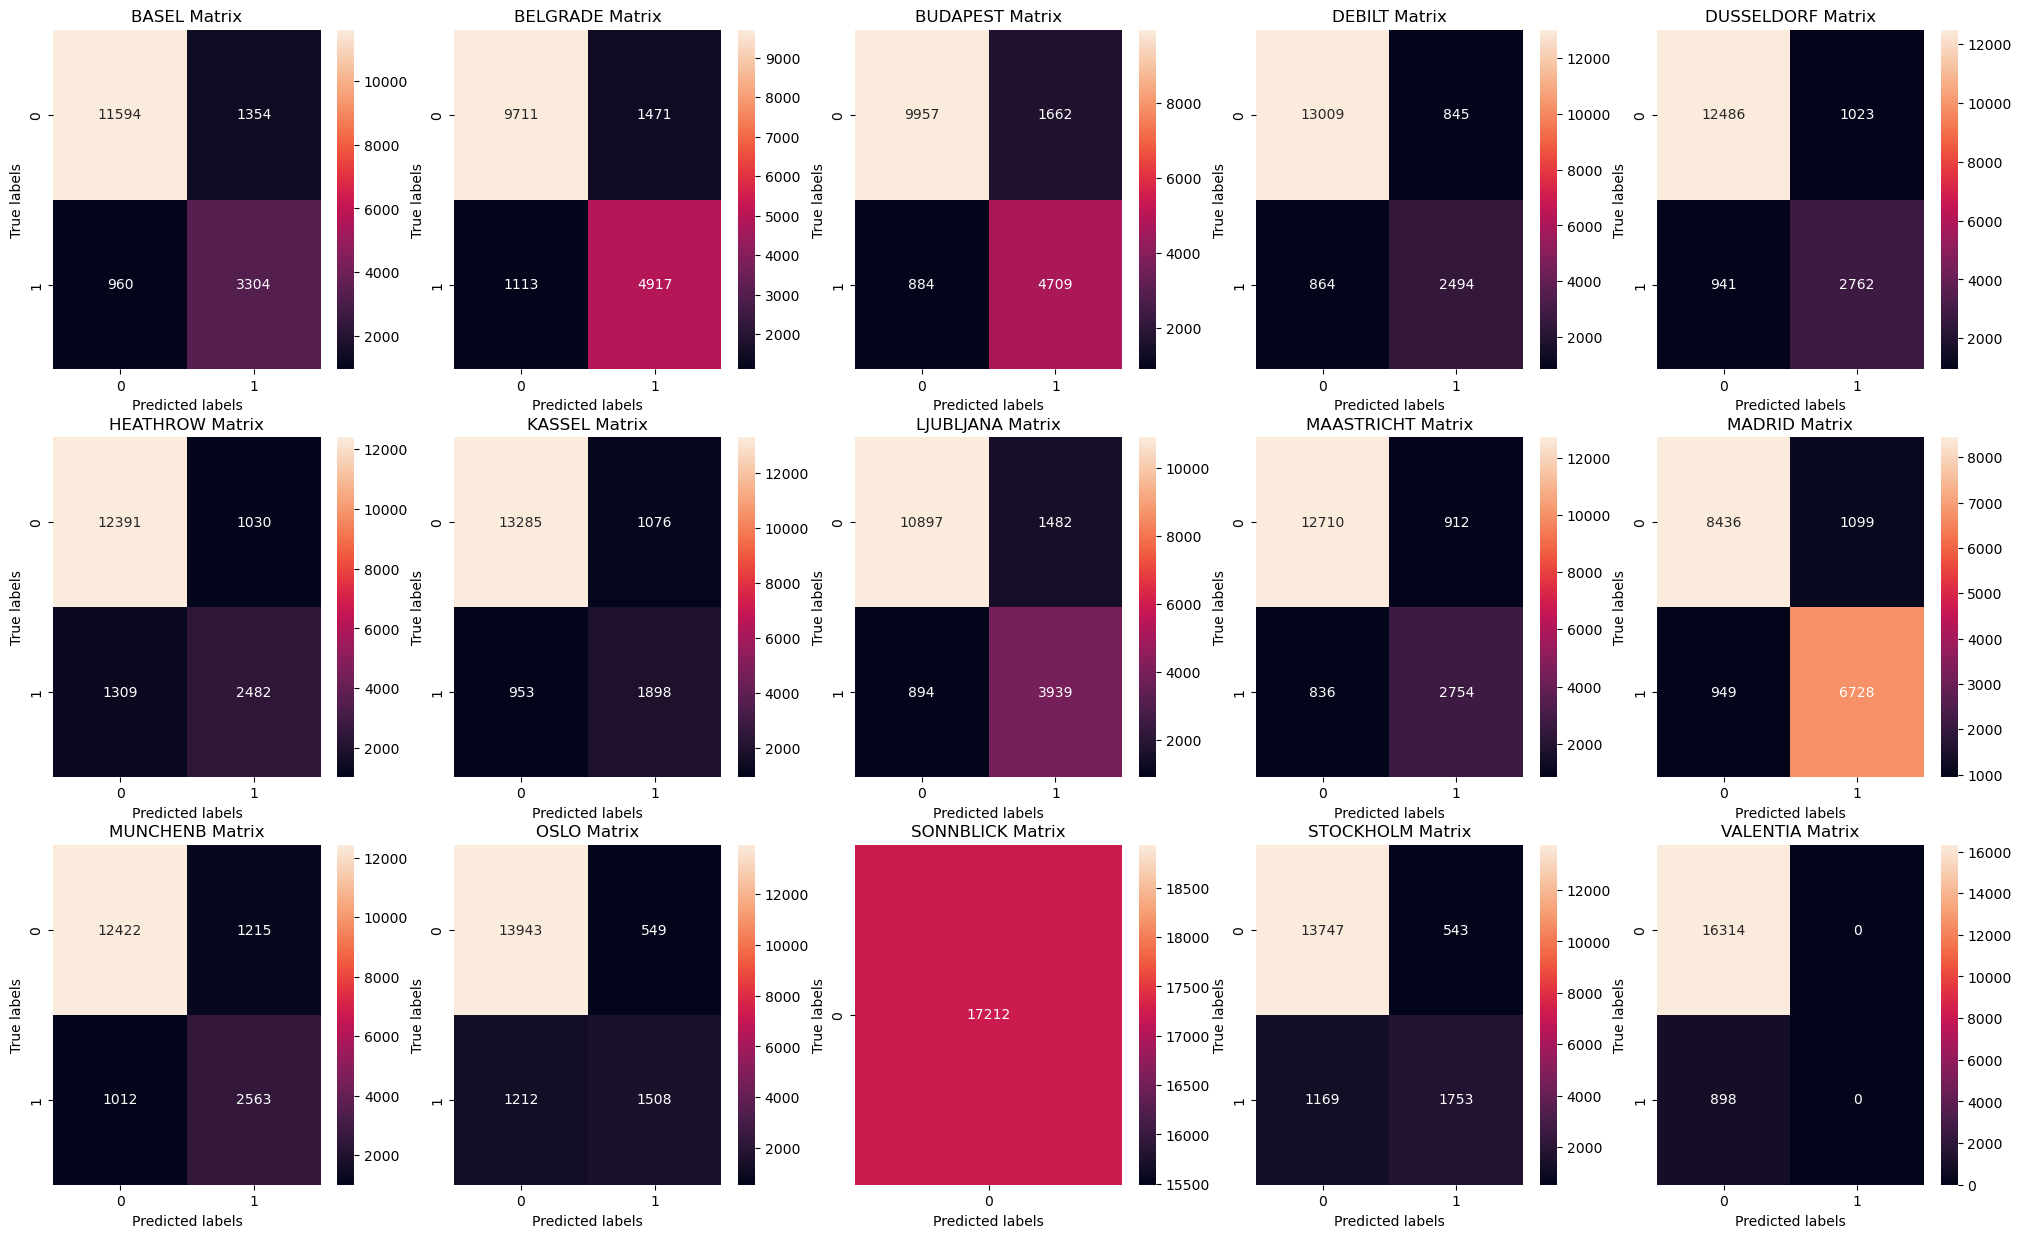

In [40]:
#Confusion matrix based on the last "k" in the sequence (Training data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [41]:
# evaluate the trained model on the test dataset instead of the test dataset.

y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.4506796793307773


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


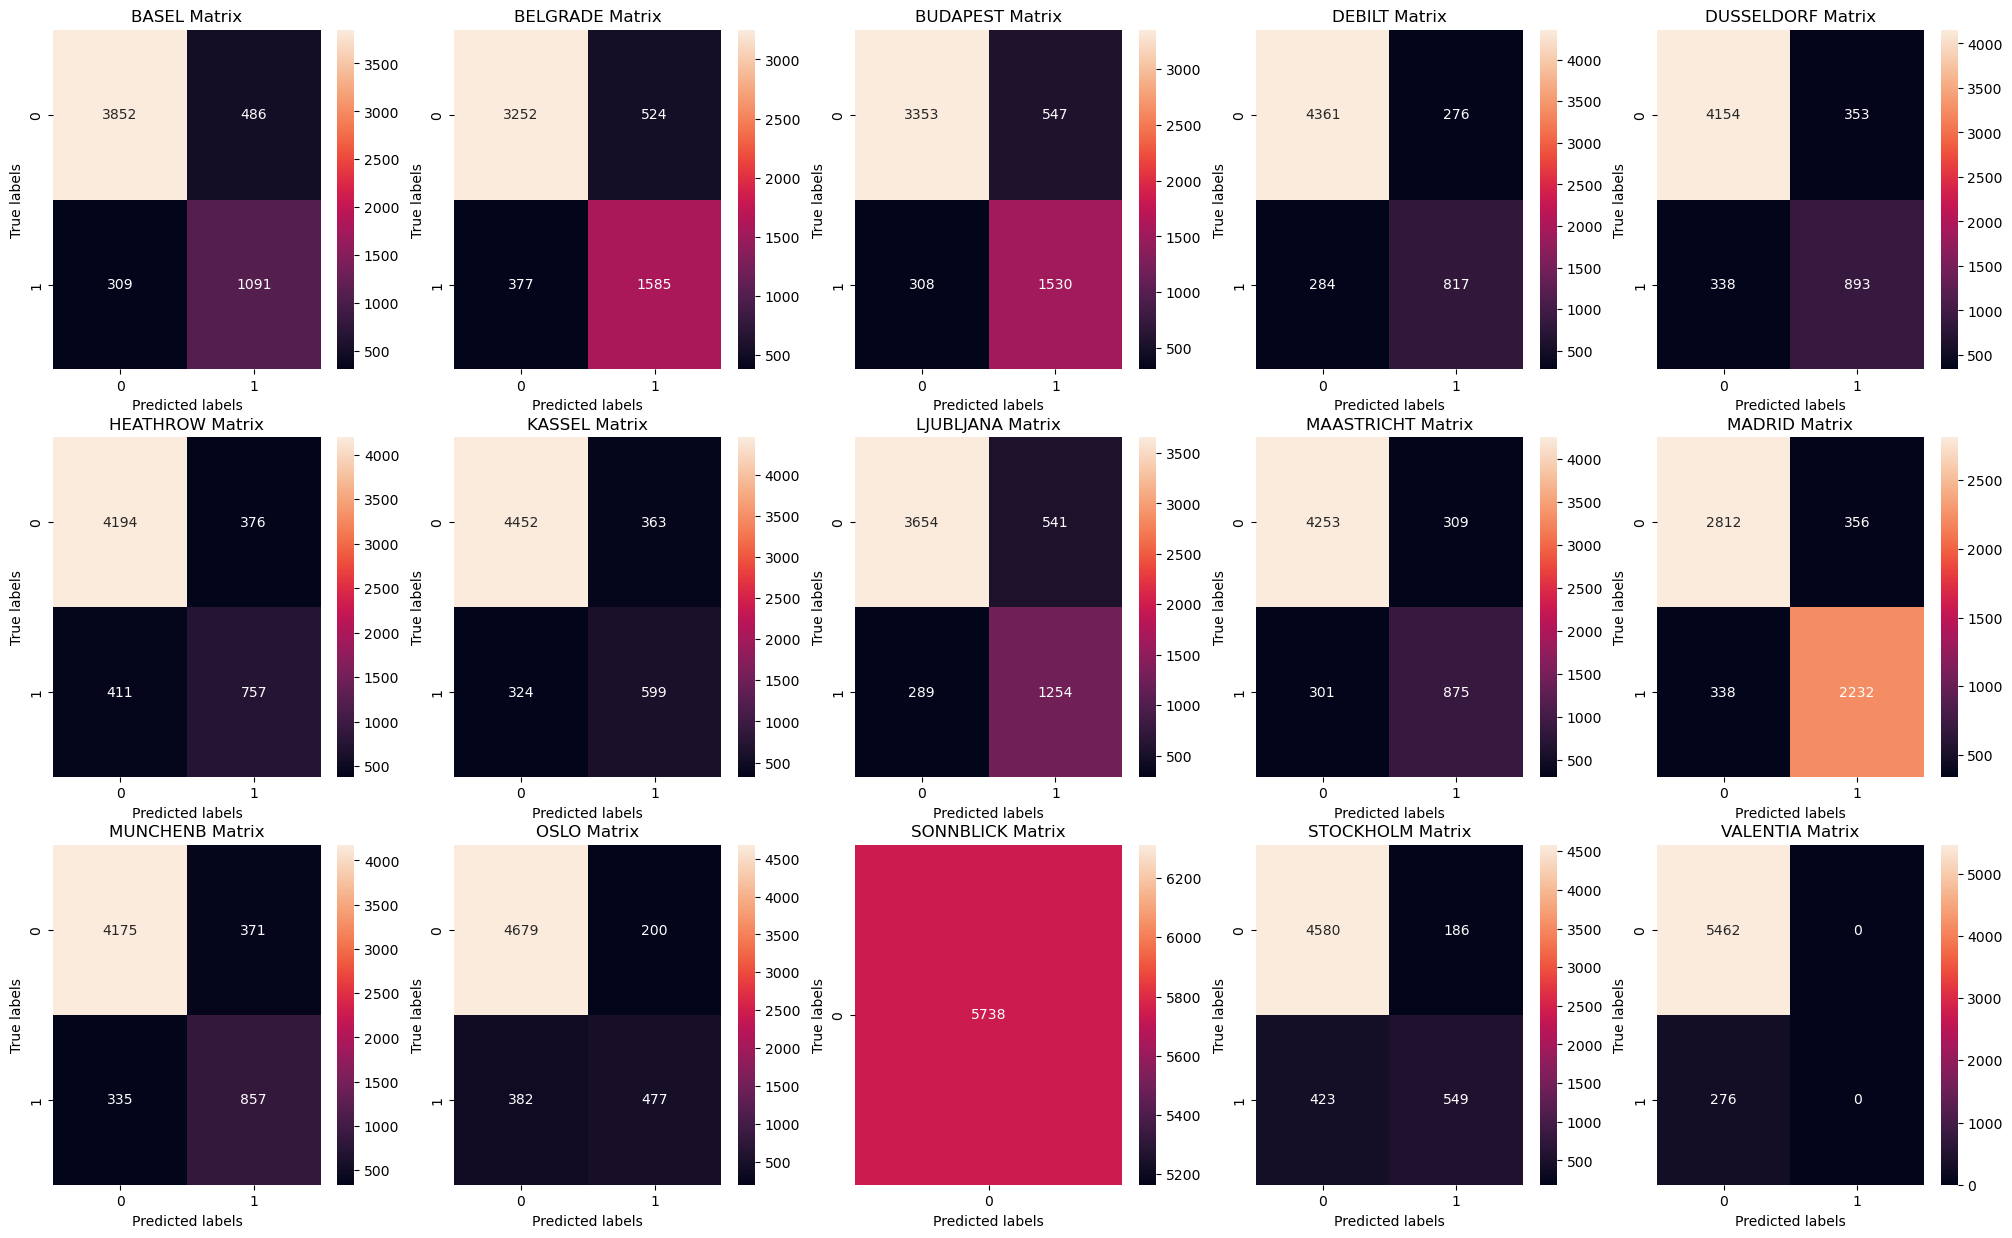

In [42]:
#Confusion matrix based on the last "k" in the sequence (Test data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])  # Change to test set
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### **Model config (10,10)**, max_iter=500, tol=0.0001 - Training and Test

In [44]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)

#### The ANN has not yet converged on an answer. Let's see how accurate it is.

In [46]:
# evaluate the trained model on the test dataset instead of the training dataset.

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))

0.48123402277480826


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


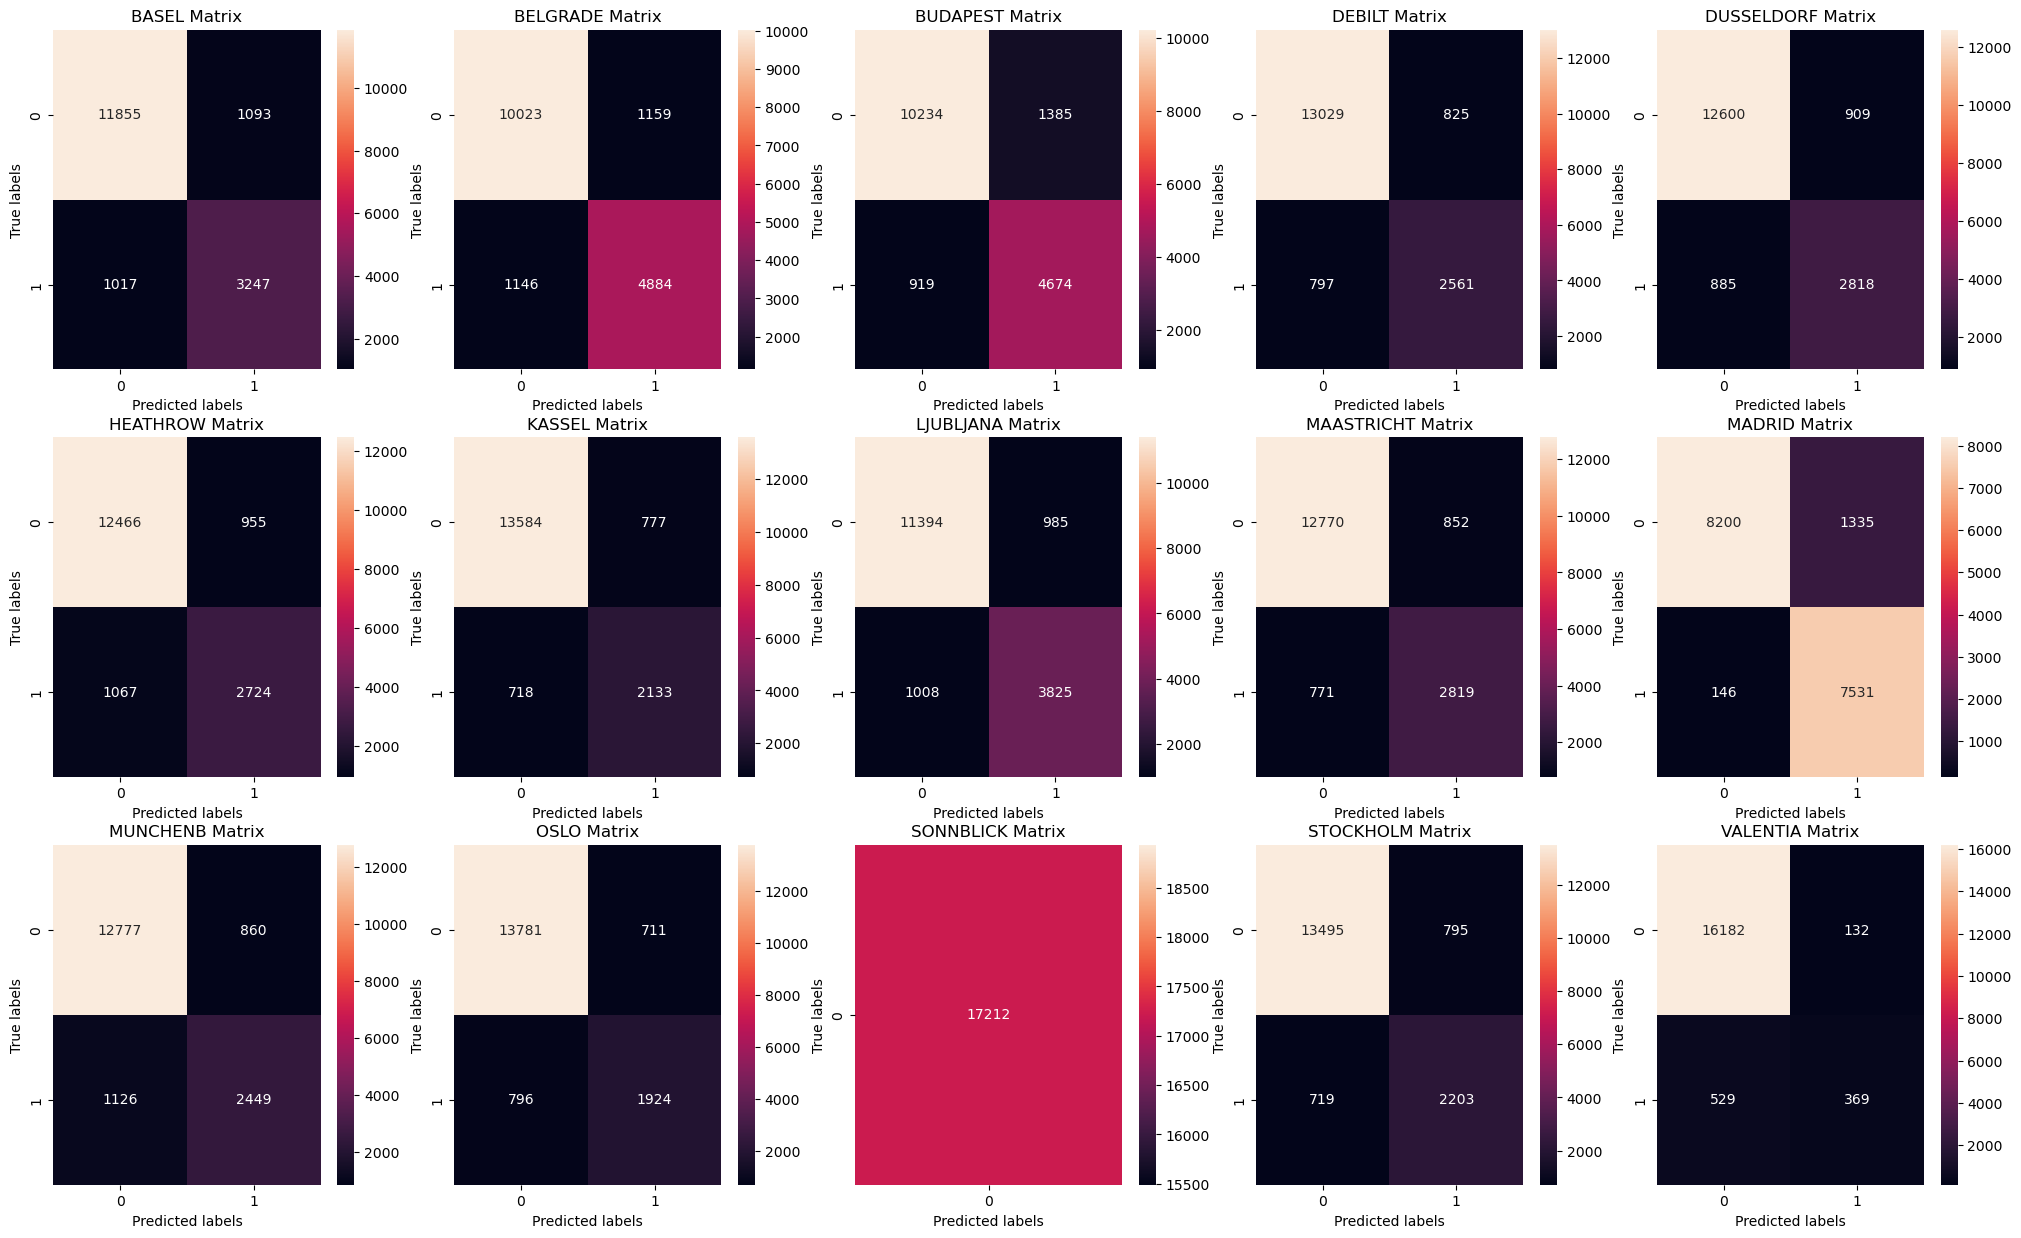

In [47]:
#Confusion matrix based on the last "k" in the sequence (Training data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [48]:
# evaluate the trained model on the test dataset instead of the test dataset.

y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.48553502962704775


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


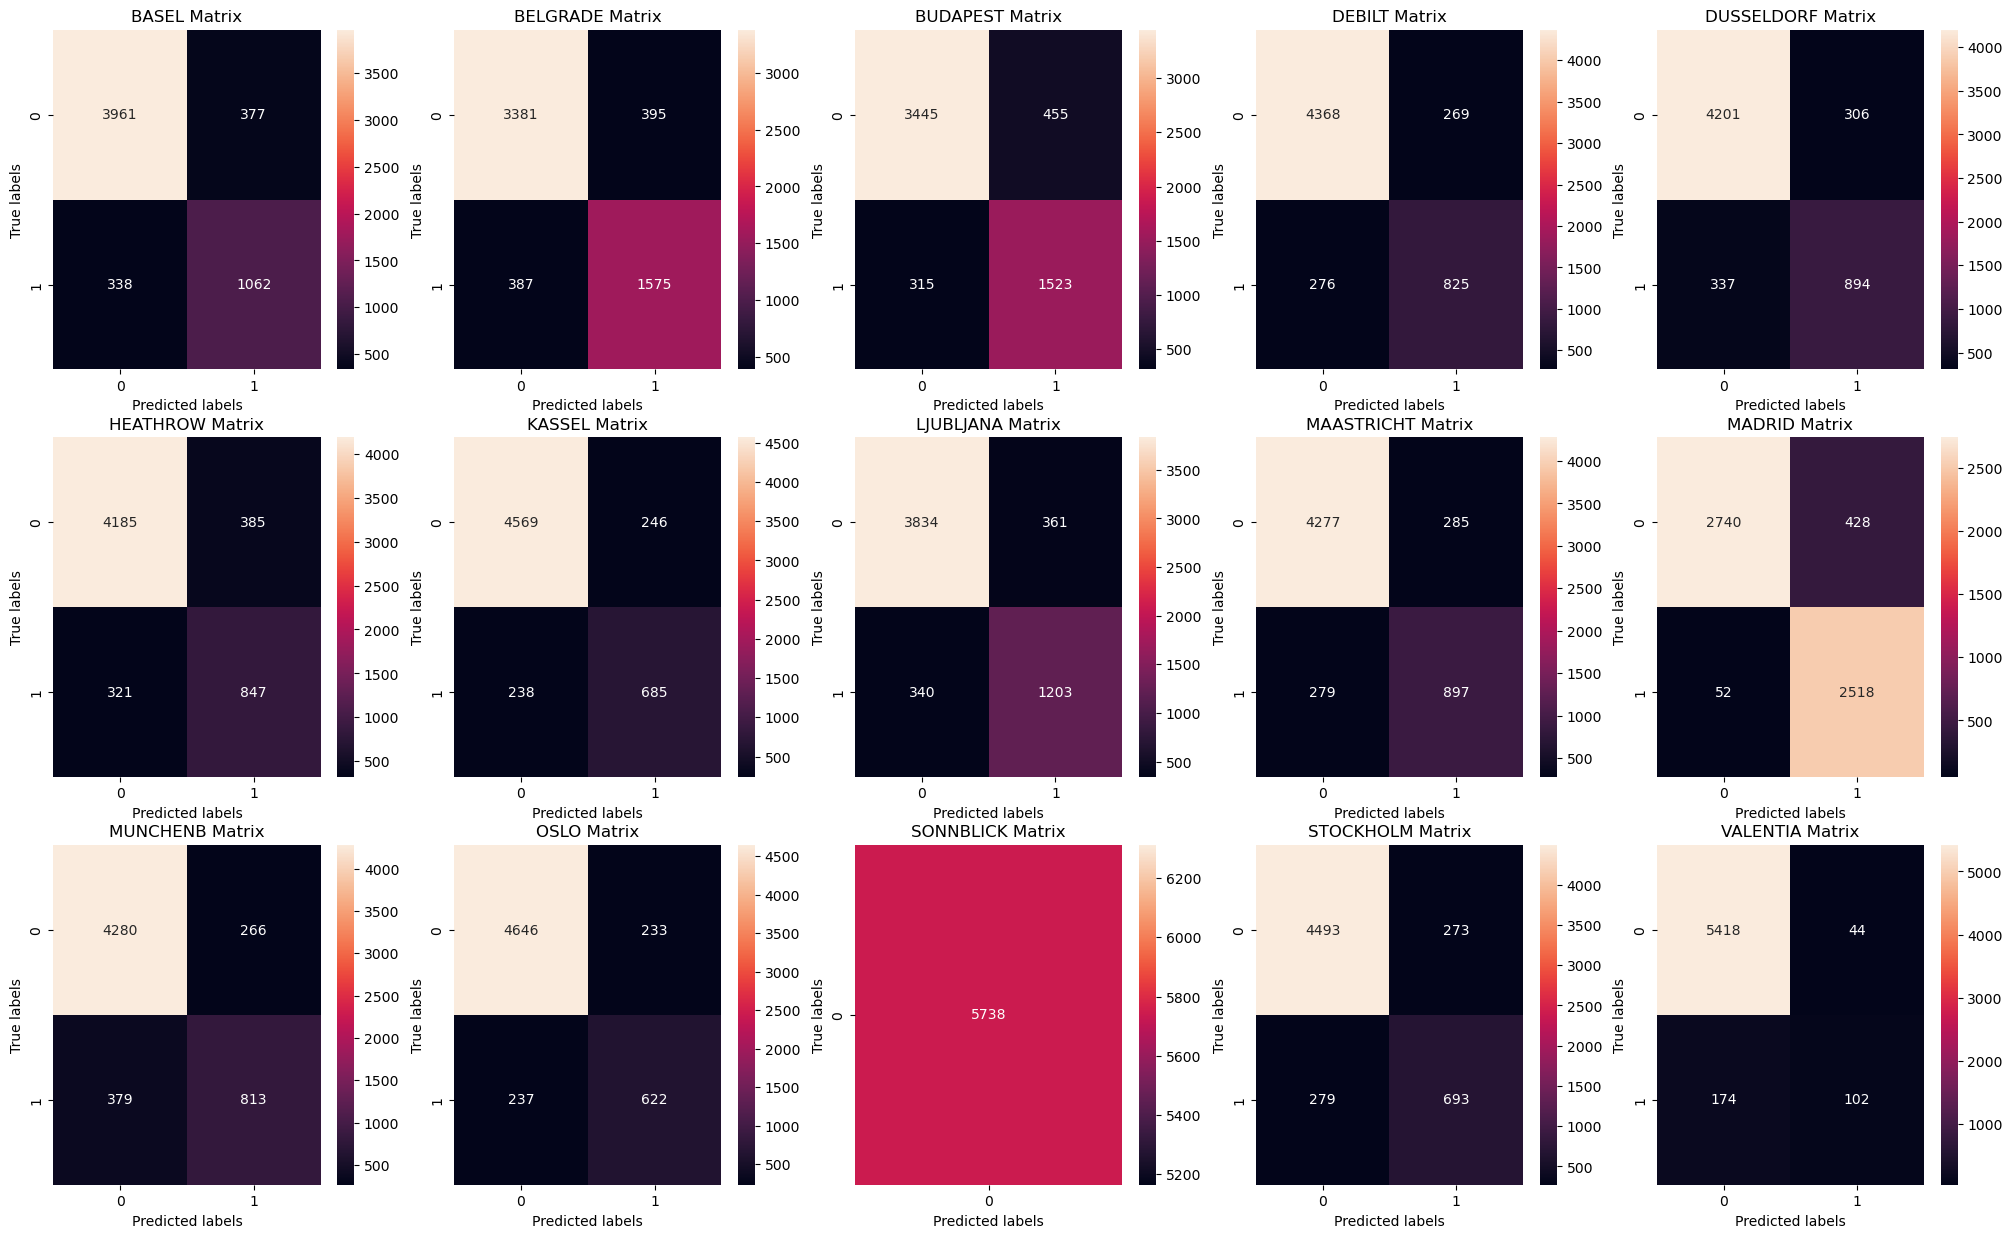

In [49]:
#Confusion matrix based on the last "k" in the sequence (Test data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])  # Change to test set
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Model config (5,5), **max_iter=1000**, tol=0.0001 - Training and Test

In [51]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000)

#### The ANN has not yet converged on an answer. Let's see how accurate it is.

In [53]:
# evaluate the trained model on the test dataset instead of the training dataset.

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))

0.4579363234952359


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


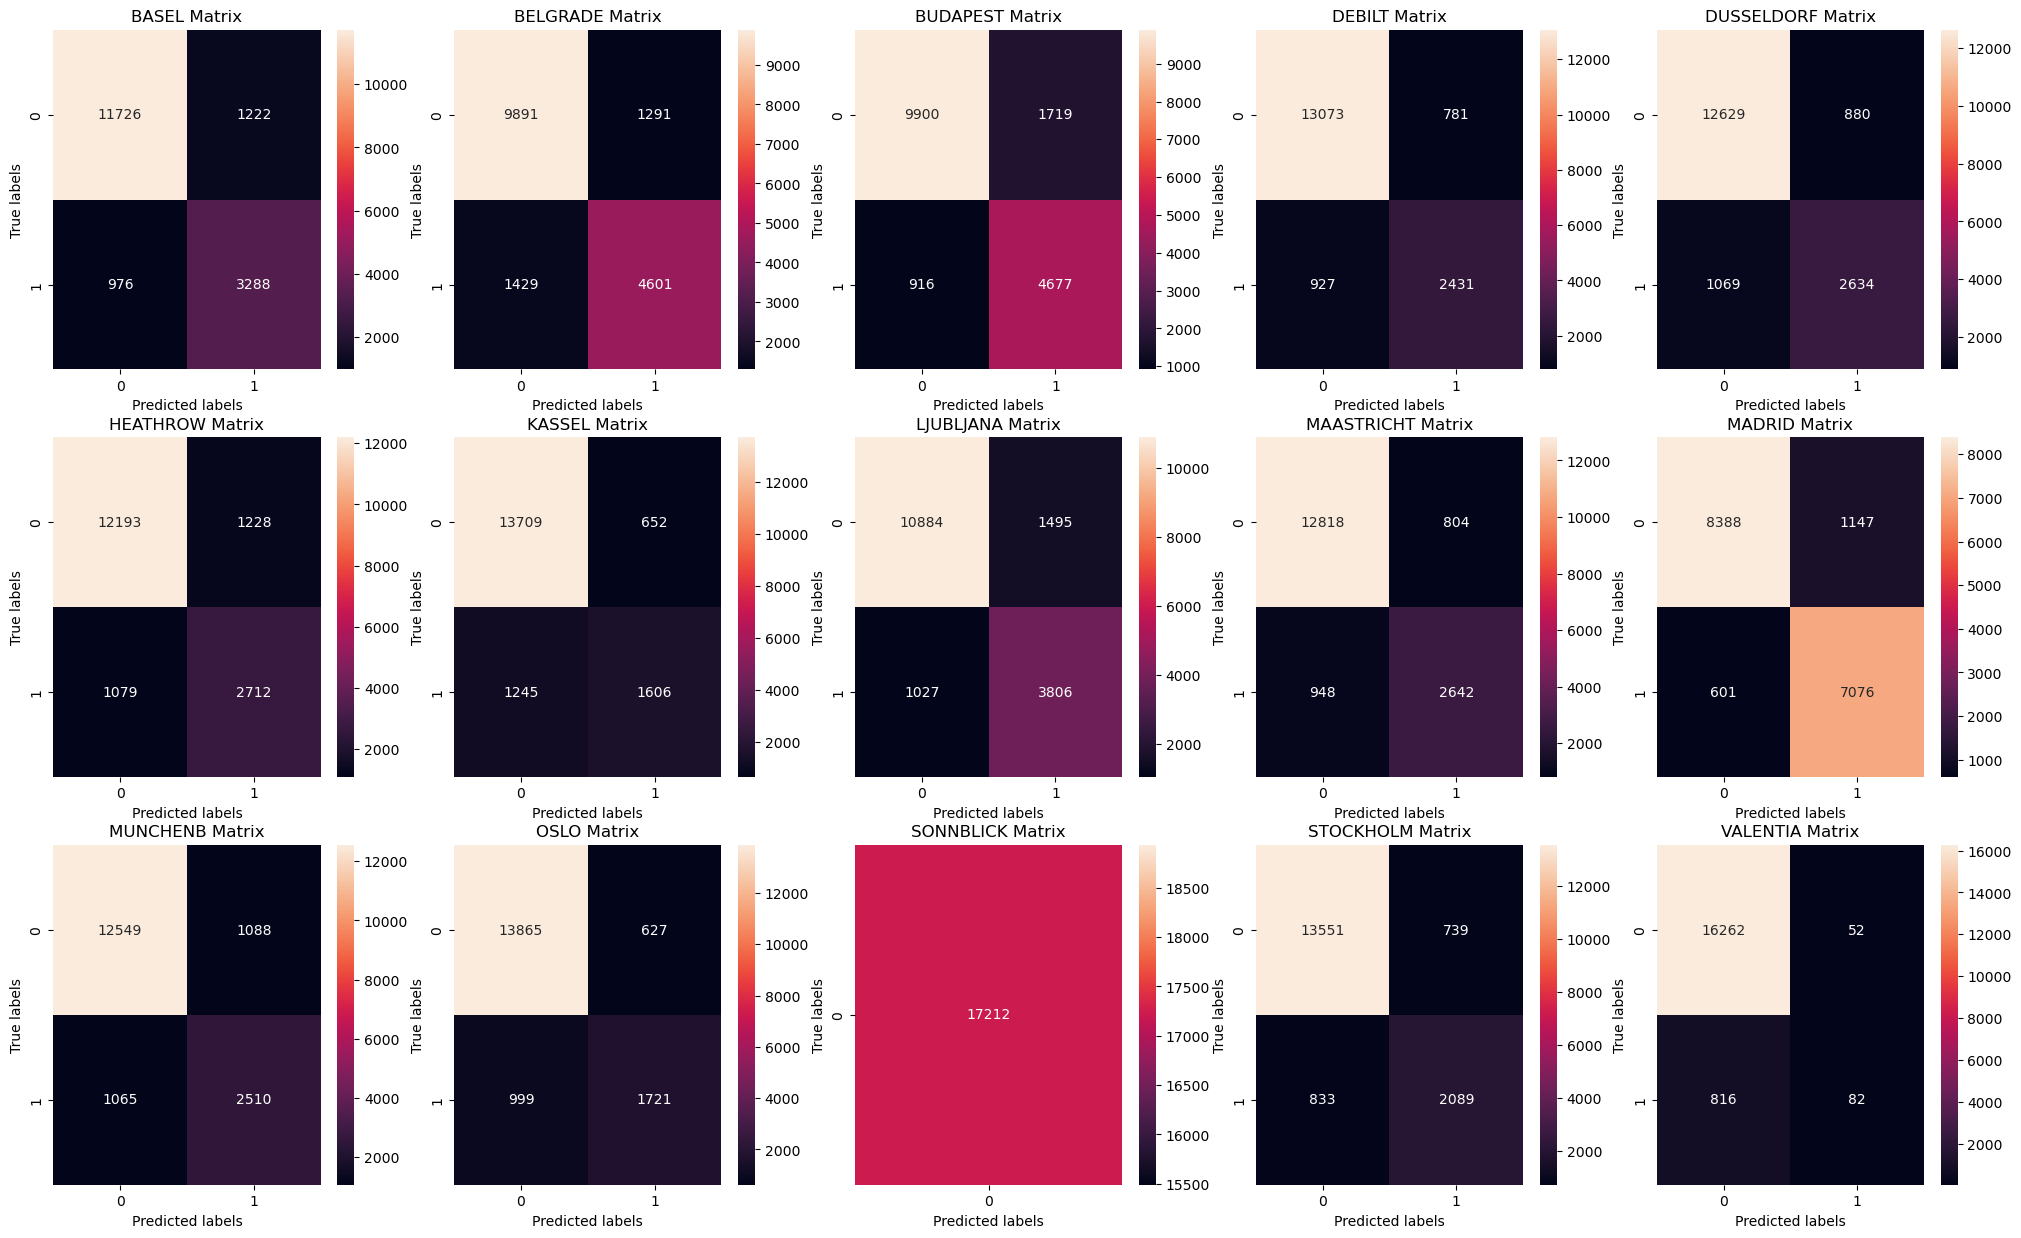

In [54]:
#Confusion matrix based on the last "k" in the sequence (Training data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [55]:
# evaluate the trained model on the test dataset instead of the test dataset.

y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.463401882188916


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


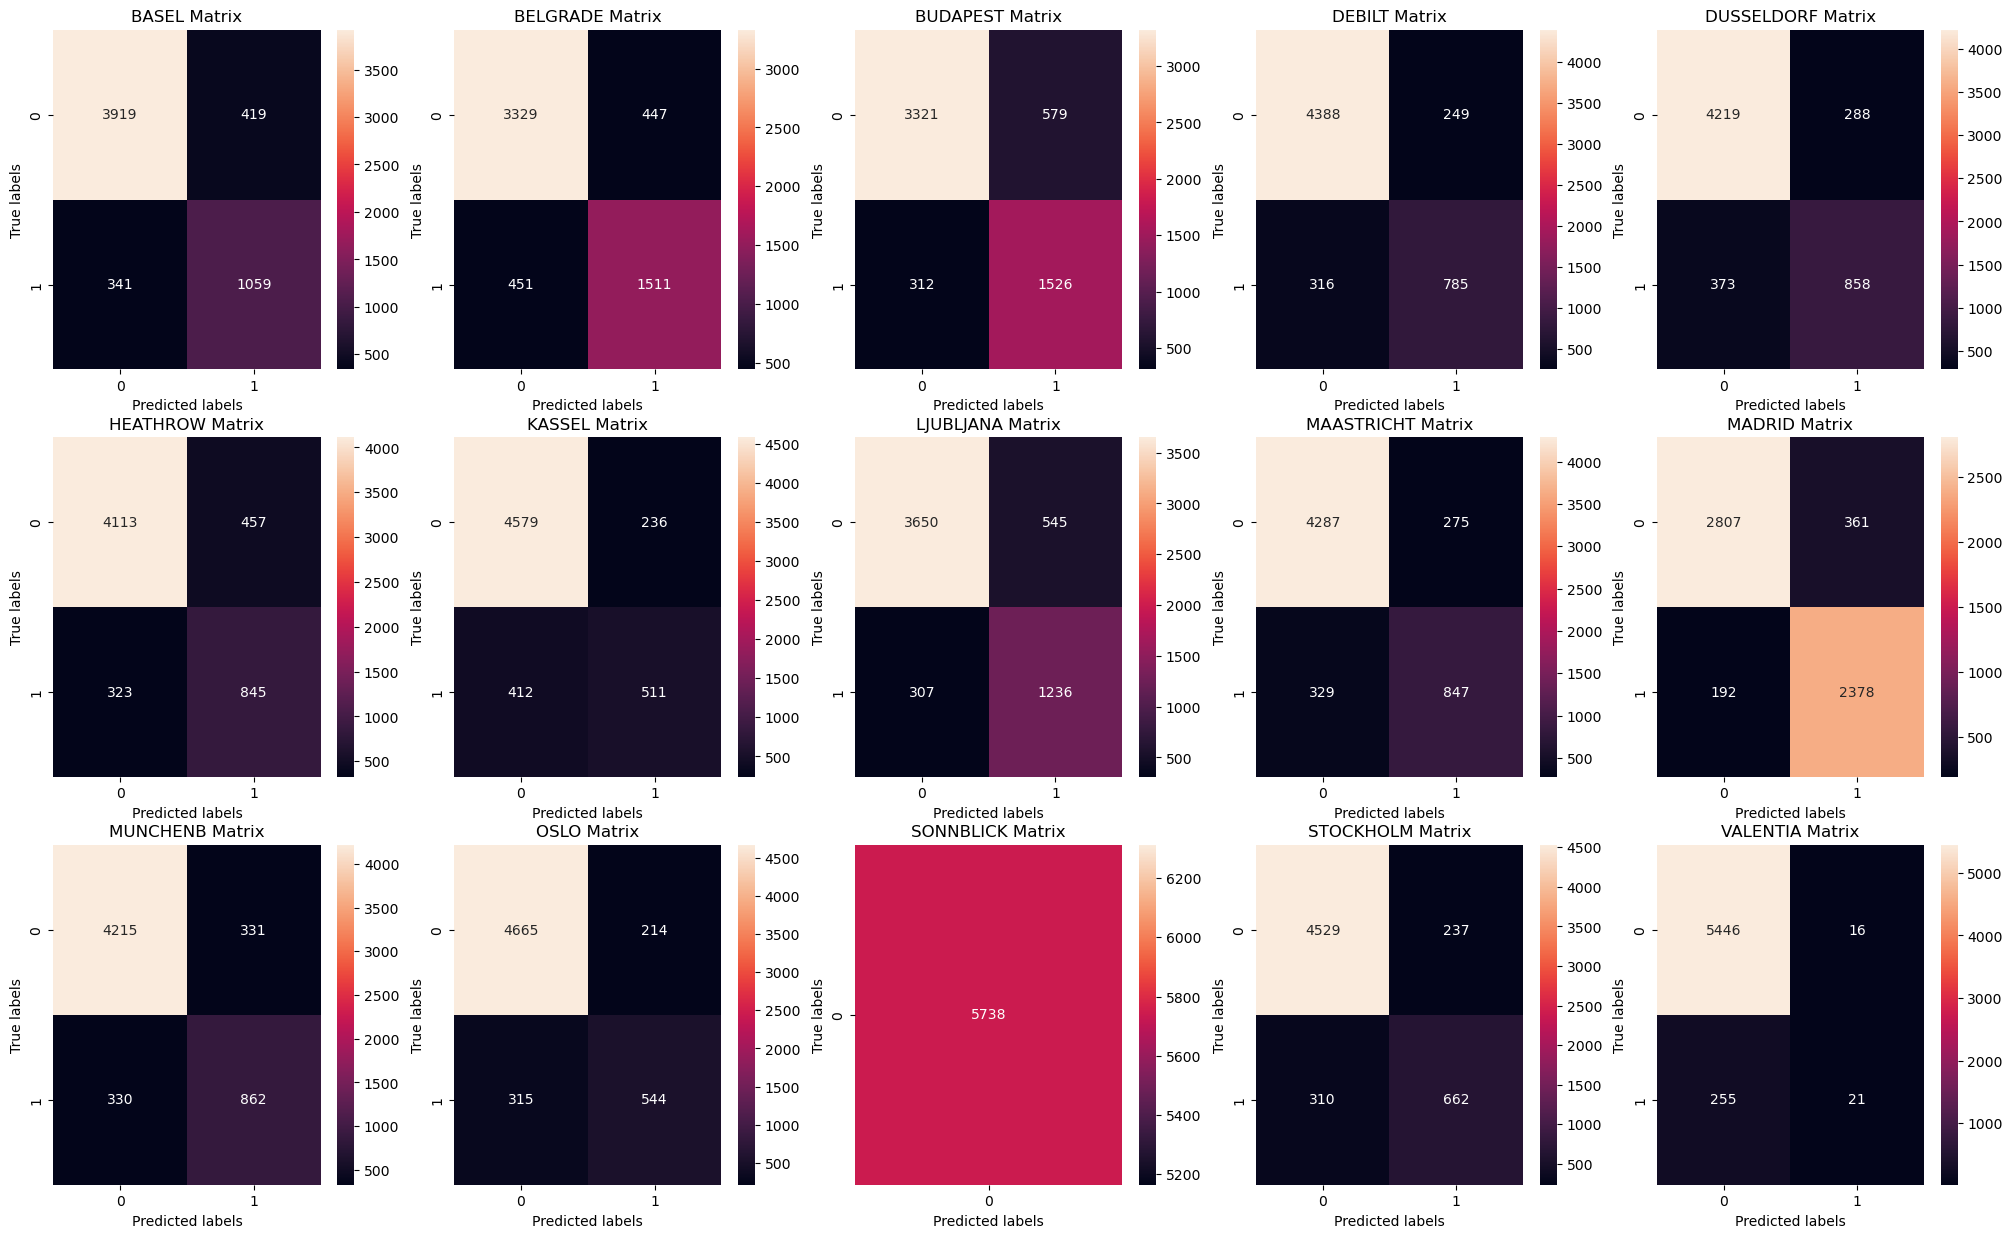

In [56]:
#Confusion matrix based on the last "k" in the sequence (Test data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])  # Change to test set
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Model config (5,5), max_iter=500, **tol=0.01** - Training and Test

In [58]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, tol=0.01)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, tol=0.01)

#### The ANN has not yet converged on an answer. Let's see how accurate it is.

In [60]:
# evaluate the trained model on the test dataset instead of the training dataset.

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))

0.4535207994422496


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


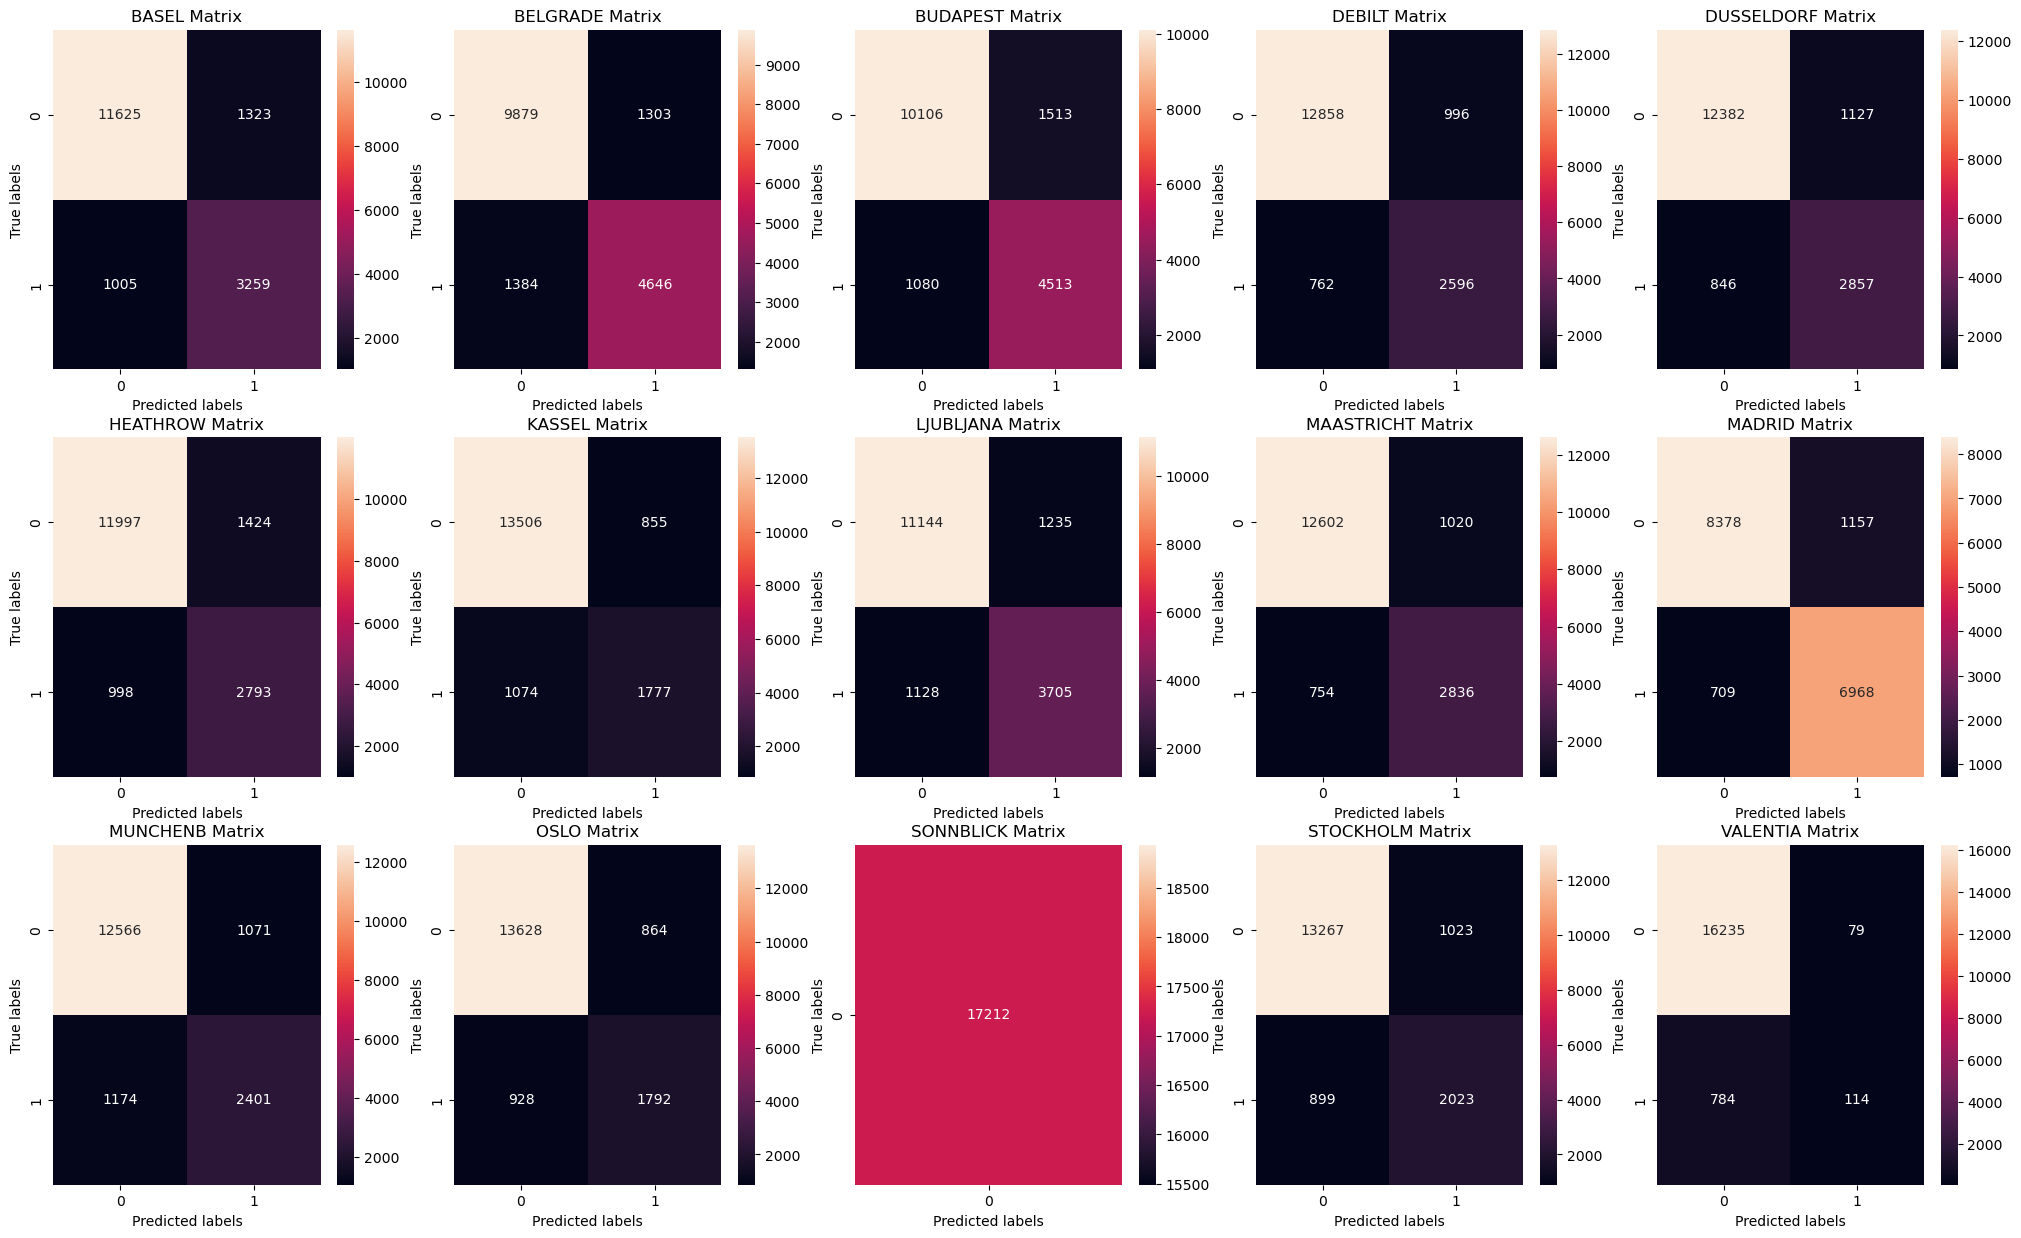

In [61]:
#Confusion matrix based on the last "k" in the sequence (Training data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [62]:
# evaluate the trained model on the test dataset instead of the test dataset.

y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.4588706866504008


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


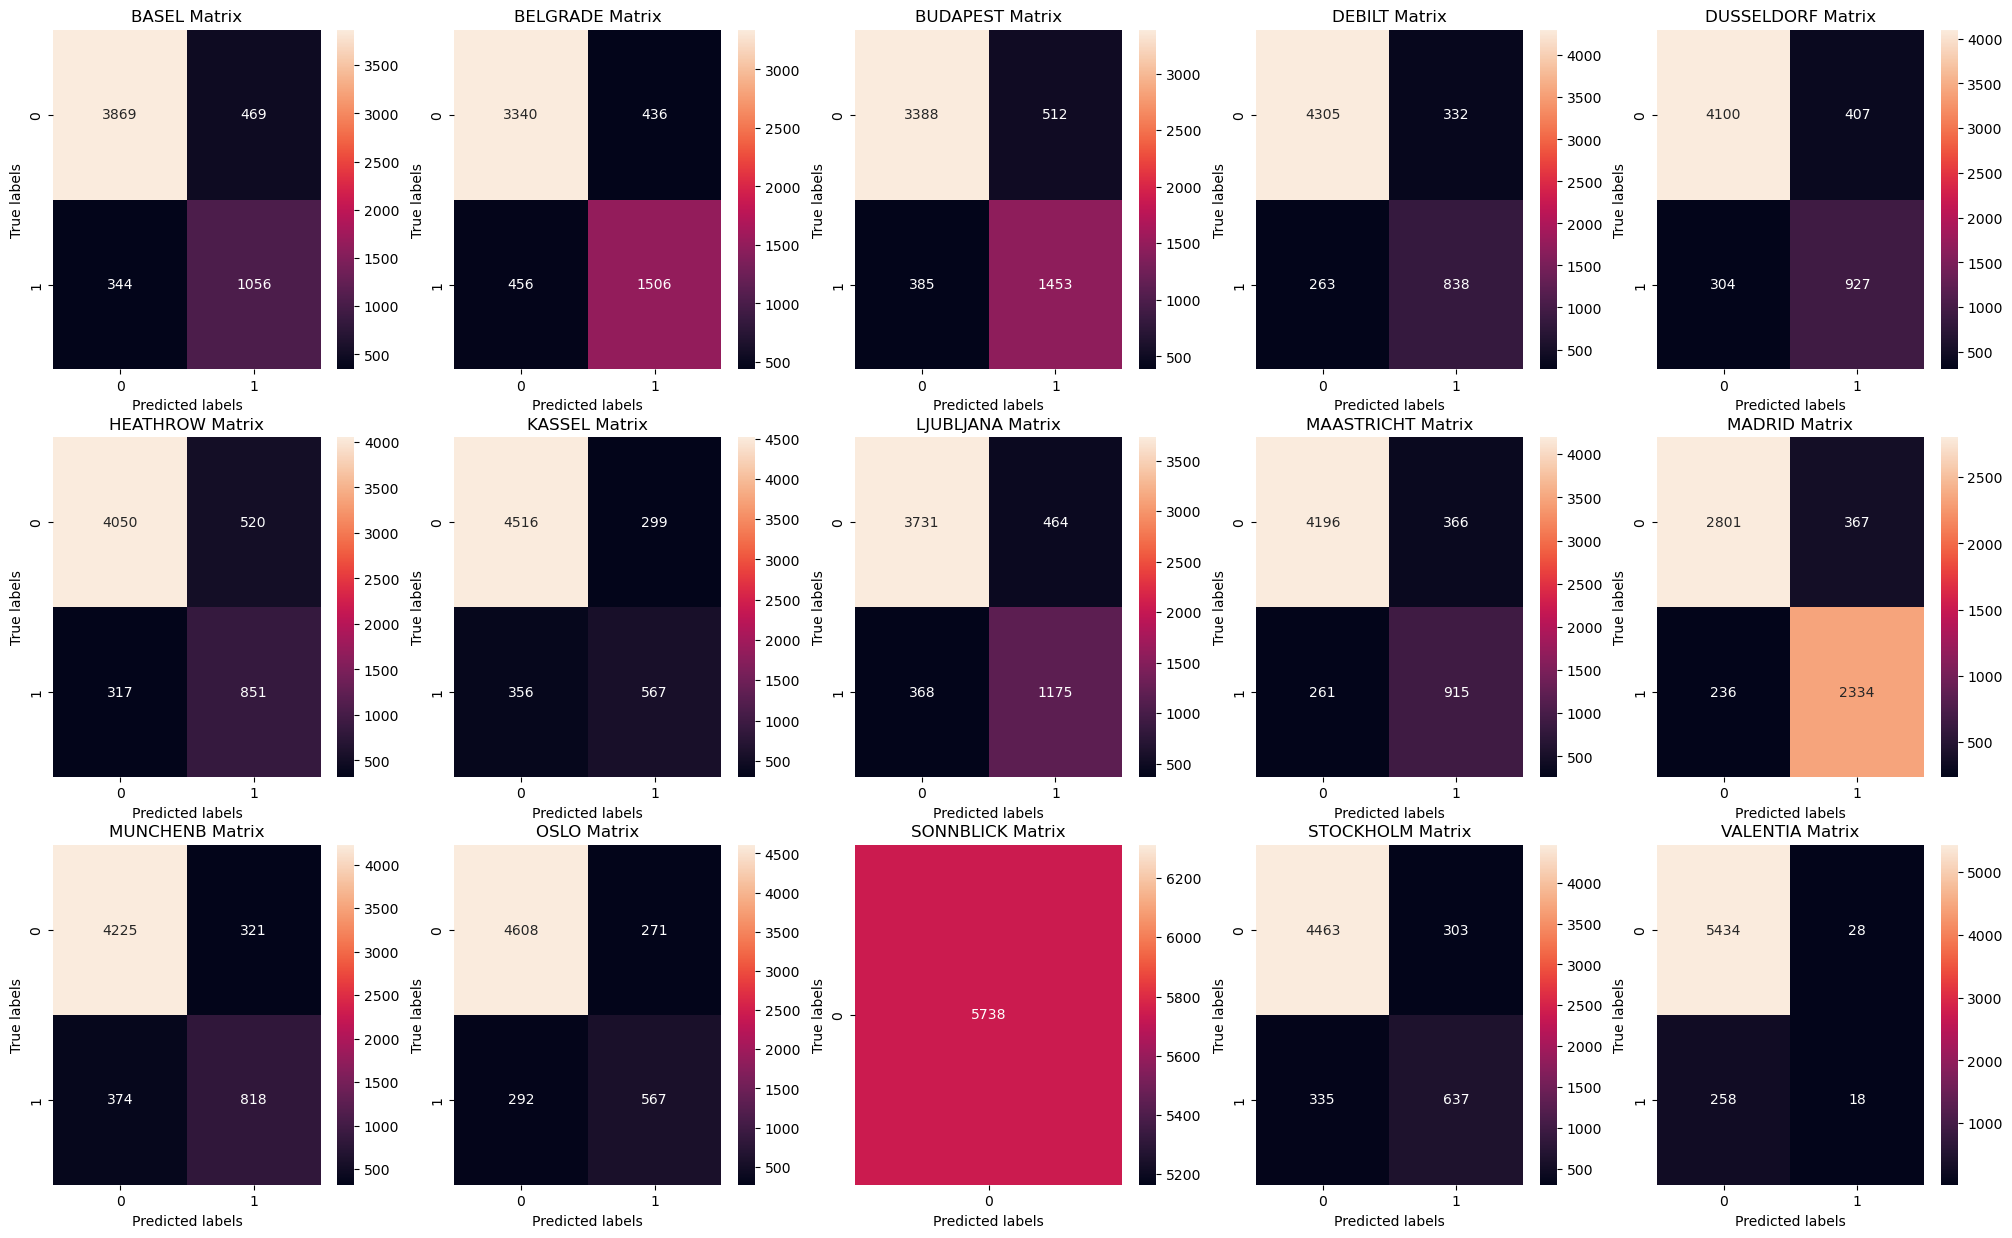

In [63]:
#Confusion matrix based on the last "k" in the sequence (Test data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])  # Change to test set
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Model config (50,50,60), max_iter=500, tol=0.0001 - Training and Test

In [65]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(50,50,60), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 60), max_iter=500)

#### The ANN has not yet converged on an answer. Let's see how accurate it is.

In [67]:
# evaluate the trained model on the test dataset instead of the training dataset.

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))

0.5156286311875435


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


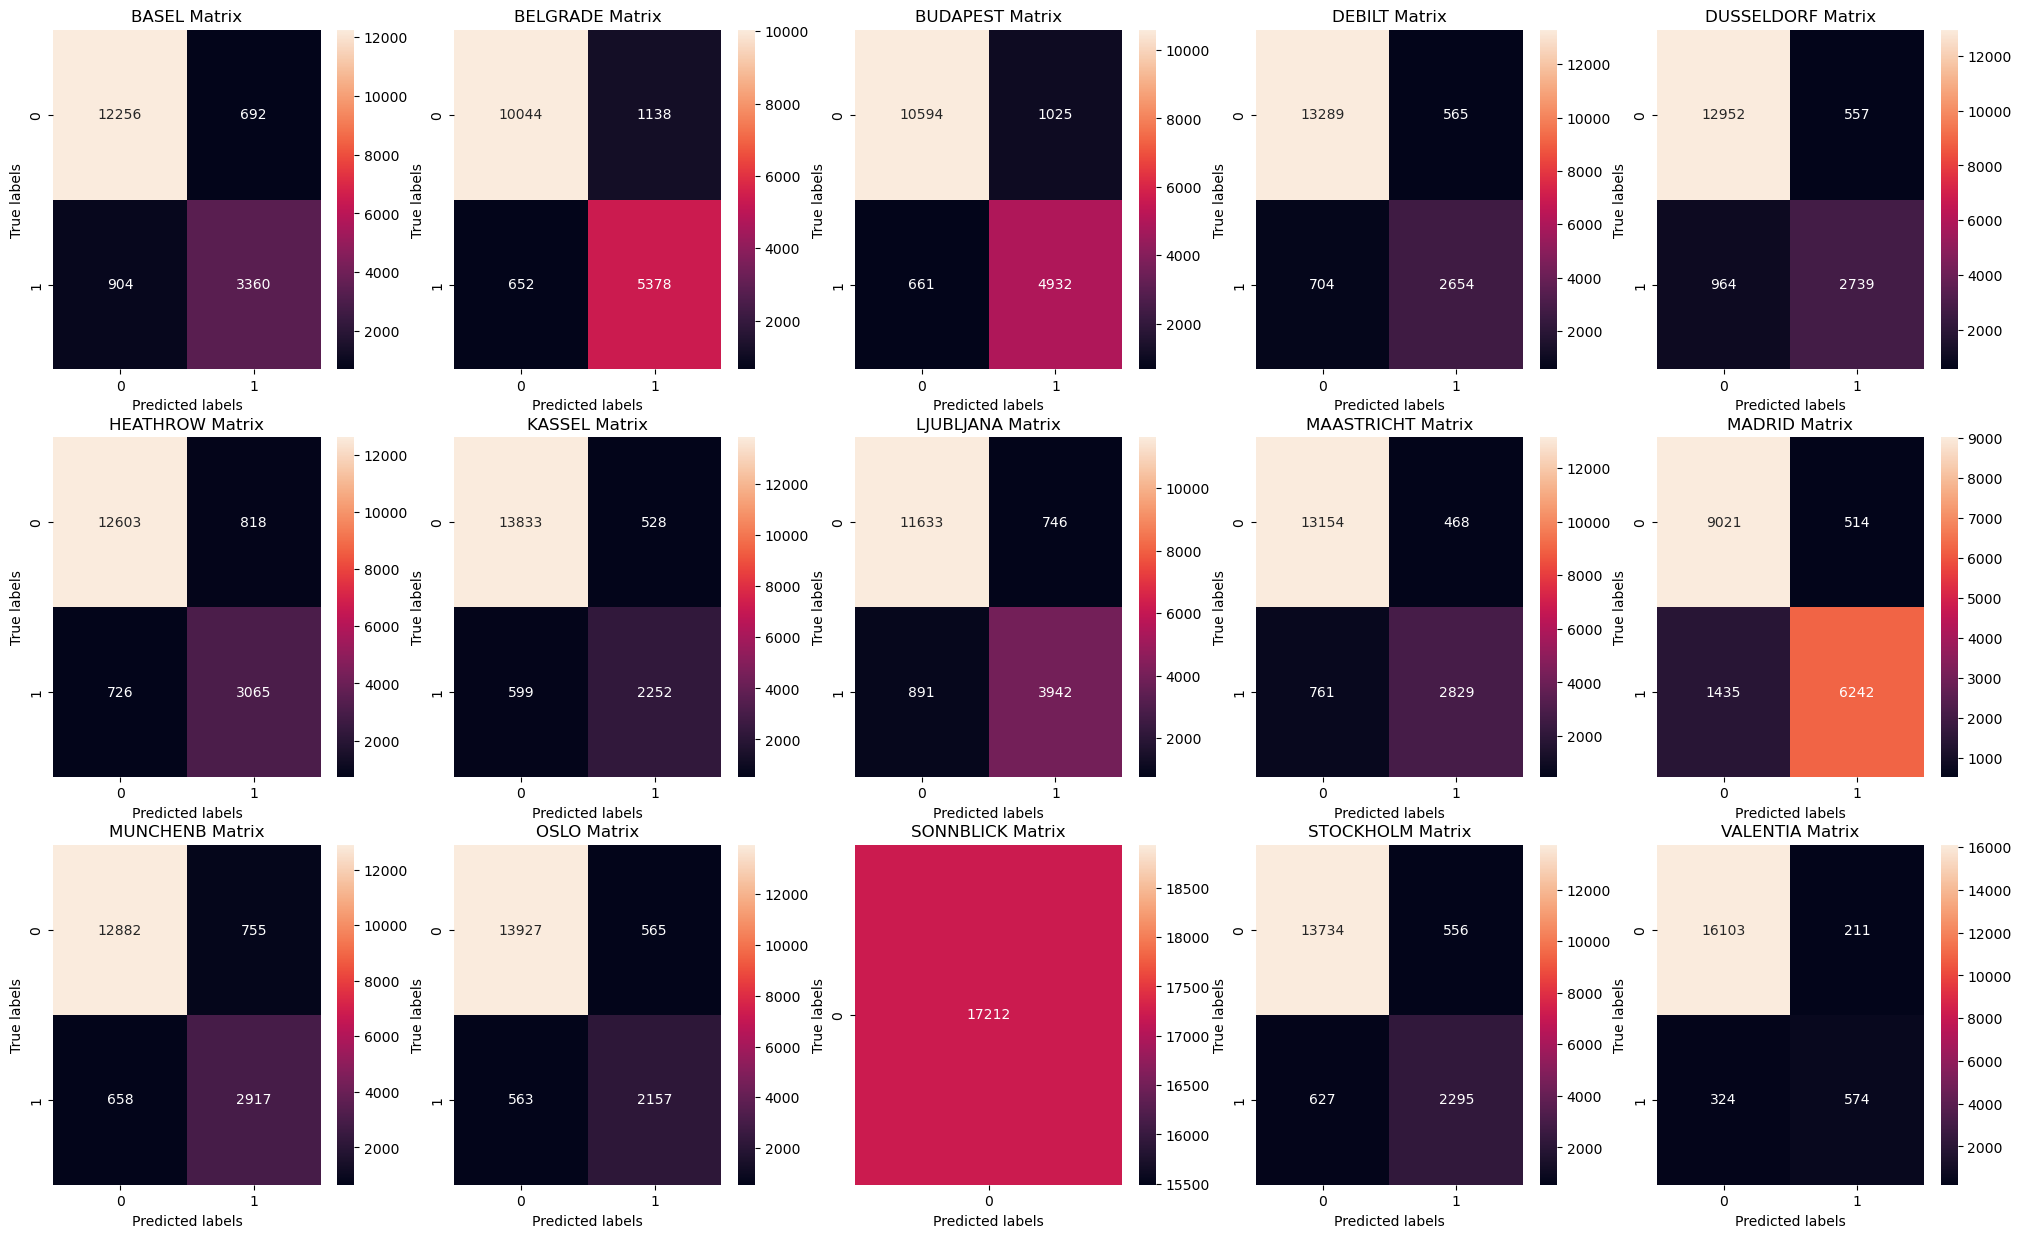

In [68]:
#Confusion matrix based on the last "k" in the sequence (Training data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [69]:
# evaluate the trained model on the test dataset instead of the test dataset.

y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.4839665388637156


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


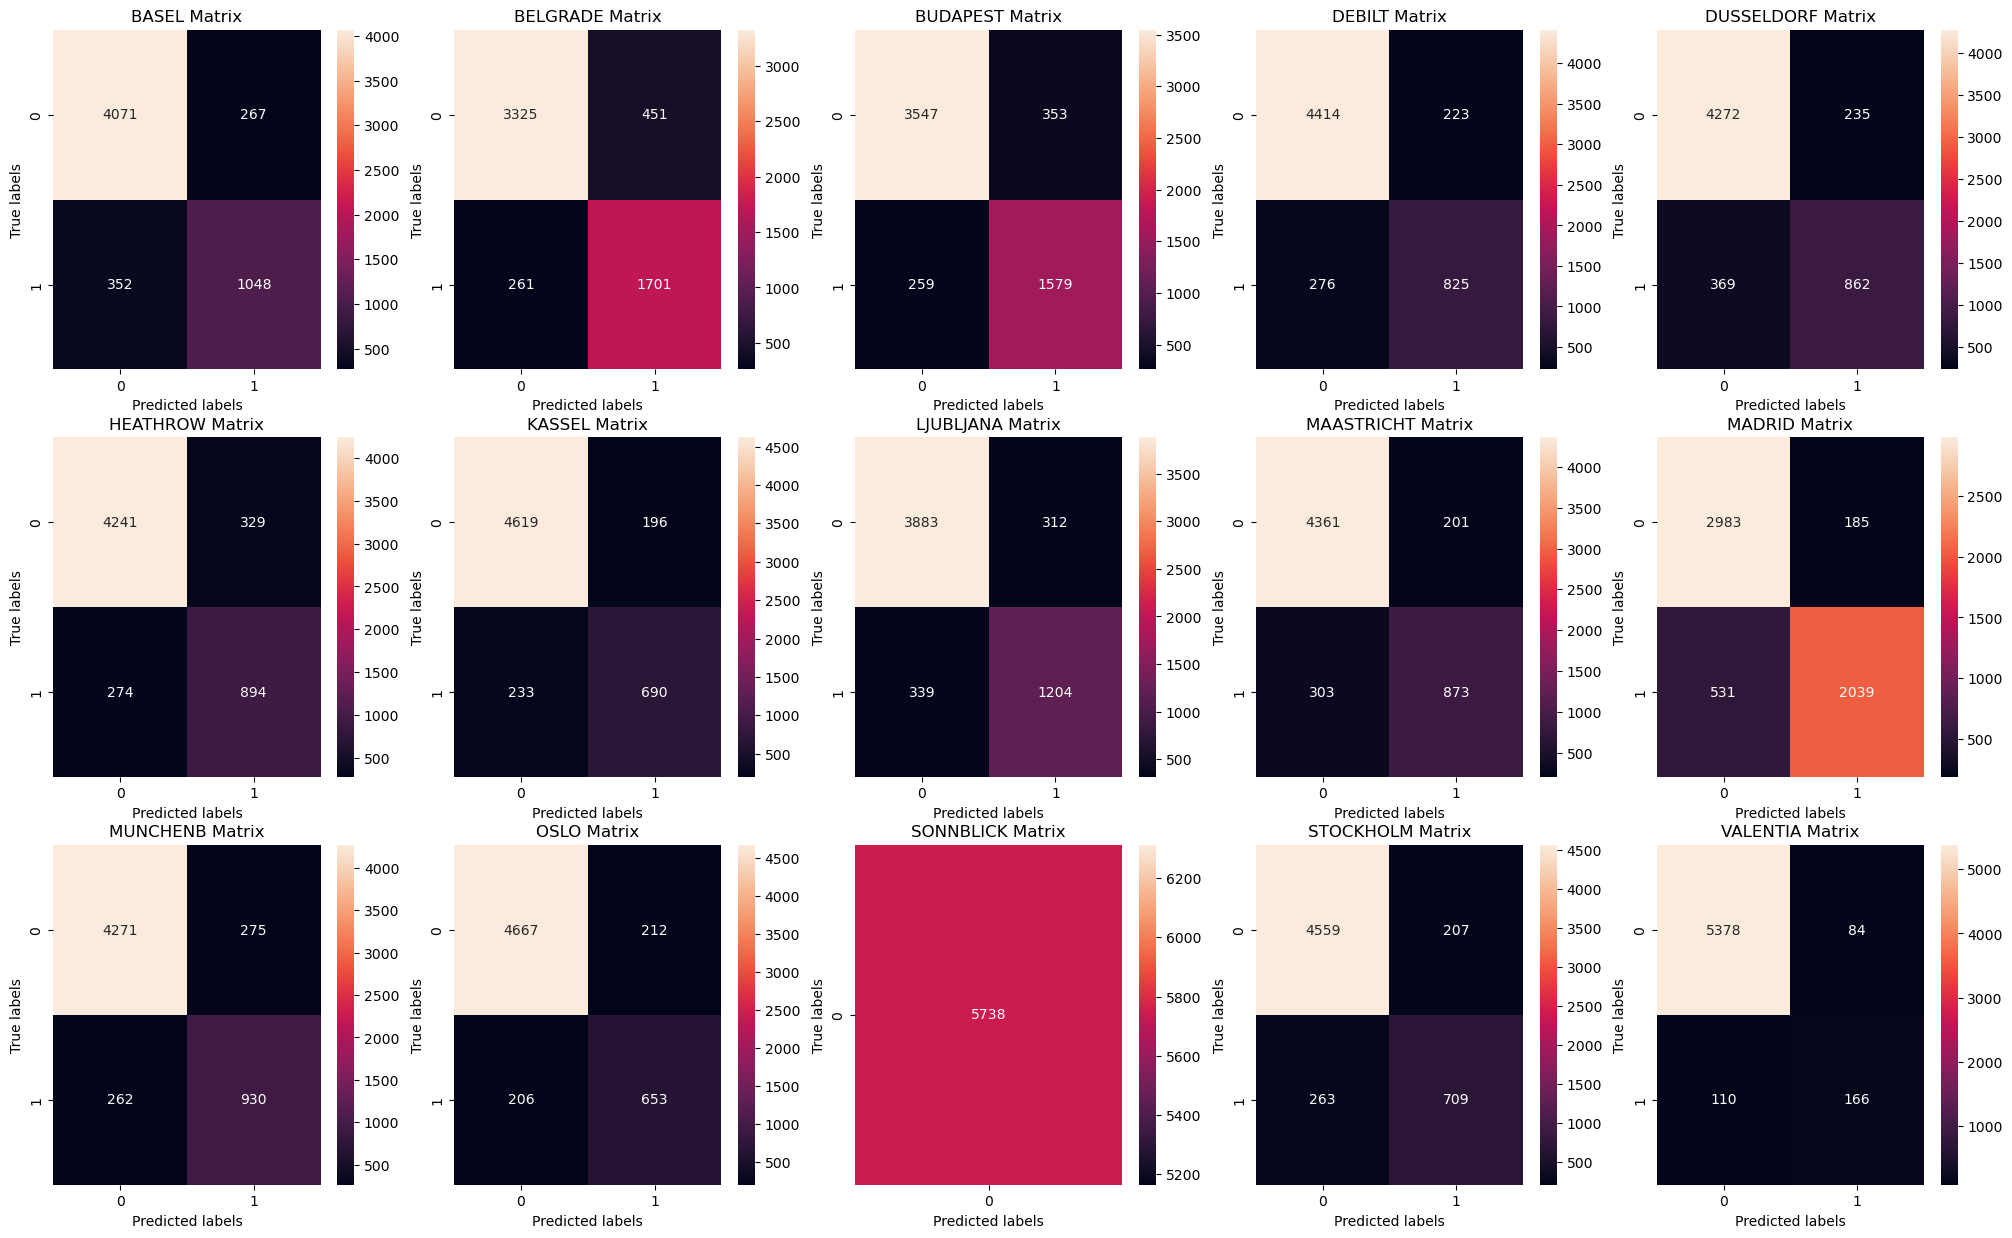

In [70]:
#Confusion matrix based on the last "k" in the sequence (Test data)

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])  # Change to test set
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1